Dataset information:
https://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

1. Perform Exploratory data analysis. (20)
- What can you conclude from methods of central tendency and deviation of
the variables?
 - ANSWER: There are no missing values based on the counts. The means for age and auxillary nodes are relatively close to each other (in the tens) so normalization may not be necessary. The standard deviations for each variable are small which may indicate small or non-diverse data set.
- Are there any correlated variables?
 - ANSWER: no correlation is found, all variable relationships are below .4, which is good.
- Interpret the skewness of the variables.
 - ANSWER: Age has a normalized distribution.  Num axillary nodes needs to have outliers removed and shows a positive skew which may need to be normalized.

In [1]:
# Load the data
### Survival status (class attribute)
###    1 = the patient survived 5 years or longer
###    2 = the patient died within 5 year

import pandas as pd

col_names = ["AgeAtOperation","OperationYear","NumAxillaryNodes","SurvivalStatus"]
data = pd.read_csv("haberman.data", names=col_names)

data

,AgeAtOperation,OperationYear,NumAxillaryNodes,SurvivalStatus
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


In [28]:
# Central Tendancy and Deviation
import statistics 

data.describe()

#ANSWER: see question #1 above

,AgeAtOperation,OperationYear,NumAxillaryNodes,SurvivalStatus
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [29]:
print("Mode of NumAxillaryNodes is % s" % statistics.mode(data["NumAxillaryNodes"]))

Mode of NumAxillaryNodes is 0


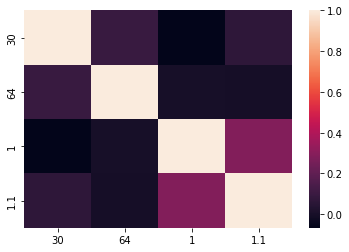

In [2]:
# Correlation
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(data.corr())
plt.show()

#ANSWER: no correlation is found, all variable relationships are below .4, which is good.

array([[<AxesSubplot:title={'center':'AgeAtOperation'}>,
        <AxesSubplot:title={'center':'OperationYear'}>],
       [<AxesSubplot:title={'center':'NumAxillaryNodes'}>,
        <AxesSubplot:title={'center':'SurvivalStatus'}>]], dtype=object)

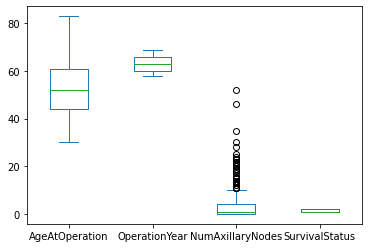

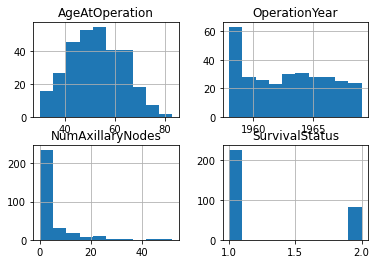

In [26]:
# Interpret Skewness and outliers

data.plot.box() # check for outlier
data.hist()     # check for skewness

#ANSWER: Age has a normalized distribution.  Num axillary nodes needs to have outliers removed and 
#  shows a positive skew which may need to be normalized. Not concerned about year because nor 
#  survival status because it is the class field

<AxesSubplot:>

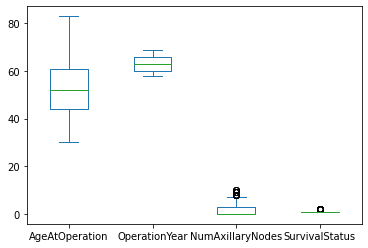

In [130]:
# remove outlier in auxillary nodes
# Max = 75% + 1.5* (75% - 25%) (IQR: interquartile range)
maximum = 4 + 1.5*(4-0)

data_no_outlier = data[data["NumAxillaryNodes"] <= maximum]
data_no_outlier.plot.box()

In [160]:
# Evaluate Standardization - Scikit-learn library

from sklearn.preprocessing import StandardScaler #for standardization
from sklearn.preprocessing import MinMaxScaler   #for normalization

scaler = StandardScaler() #to Standardize
scaler.fit(data_no_outlier)
scaled = scaler.fit_transform(data_no_outlier)
scaled_data = pd.DataFrame(scaled, columns = data_no_outlier.columns)

scaled_data

,AgeAtOperation,OperationYear,NumAxillaryNodes,SurvivalStatus
0,-2.057605,0.354548,-0.278498,-0.528059
1,-2.057605,-0.259848,0.509592,-0.528059
2,-2.057605,0.661745,-0.672543,-0.528059
3,-1.966551,-1.181441,0.115547,-0.528059
4,-1.966551,0.661745,0.903637,-0.528059
...,...,...,...,...
261,2.039805,-0.259848,-0.278498,-0.528059
262,2.130858,1.276141,-0.672543,-0.528059
263,2.221912,0.661745,0.509592,-0.528059
264,2.312965,0.661745,-0.278498,1.893728


In [161]:
# Evaluate Normalization - Scikit-learn library

from sklearn.preprocessing import StandardScaler #for standardization
from sklearn.preprocessing import MinMaxScaler   #for normalization

scaler = MinMaxScaler() #to Normalize
scaler.fit(data_no_outlier)
scaled = scaler.fit_transform(data_no_outlier)
scaled_data = pd.DataFrame(scaled, columns = data_no_outlier.columns)

scaled_data

,AgeAtOperation,OperationYear,NumAxillaryNodes,SurvivalStatus
0,0.000000,0.545455,0.1,0.0
1,0.000000,0.363636,0.3,0.0
2,0.000000,0.636364,0.0,0.0
3,0.018868,0.090909,0.2,0.0
4,0.018868,0.636364,0.4,0.0
...,...,...,...,...
261,0.849057,0.363636,0.1,0.0
262,0.867925,0.818182,0.0,0.0
263,0.886792,0.636364,0.3,0.0
264,0.905660,0.636364,0.1,1.0


2a. Develop Supervised learning models. (50)
- Logistic Regression
- Random Forest
- Support Vector Machine
- Neural Network

In [131]:
# imports needed for all learning models
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
import sklearn
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, plot_roc_curve, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier #measures distance btw 2 points
from sklearn.model_selection import cross_val_score

#hot encode data - makes the decision var the index at column 0
data_henc = pd.get_dummies(data_no_outlier, columns = ["AgeAtOperation","OperationYear","NumAxillaryNodes"])
#data_henc.columns ### no unknown columns to remove

# set up test and training data sets
X = data_henc.iloc[:,1:]  # select all columns beginning at 2nd column (index[1])
Y = data_henc.iloc[:,0]   # set as the decision var
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

Accuracy: 0.70


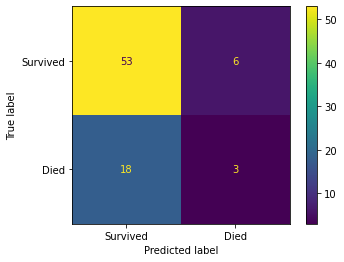

In [111]:
# Logistic Regression

#classifier = make_pipeline(StandardScaler(), LogisticRegression())
classifier = LogisticRegression(solver='lbfgs',random_state=10, penalty='none', max_iter=300)
classifier.fit(X_train, Y_train)

print('Accuracy: {:.2f}'.format(classifier.score(X_test, Y_test)))

prediction = classifier.predict(X_test)

cm = confusion_matrix(Y_test, prediction, labels=classifier.classes_)
predict_labels = ["Survived","Died"]

disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = predict_labels)
disp.plot()
plt.show()

Accuracy: 0.74


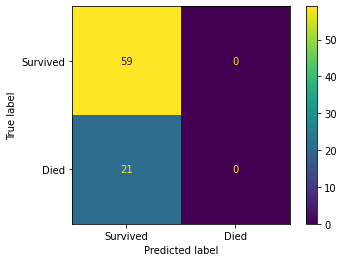

In [112]:
# Random Forest 

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, Y_train)

print('Accuracy: {:.2f}'.format(classifier.score(X_test, Y_test)))

prediction = classifier.predict(X_test)

cm = confusion_matrix(Y_test, prediction, labels=classifier.classes_)
predict_labels = ["Survived","Died"]

disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = predict_labels)
disp.plot()
plt.show()

Accuracy: 0.74


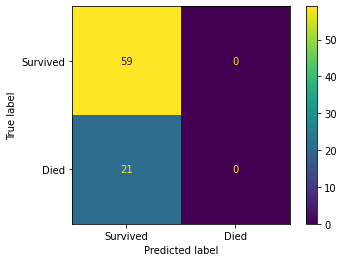

In [113]:
# Support Vector Machine

classifier = SVC(kernel='rbf')
classifier.fit(X_train, Y_train)

print('Accuracy: {:.2f}'.format(classifier.score(X_test, Y_test)))

prediction = classifier.predict(X_test)

cm = confusion_matrix(Y_test, prediction, labels=classifier.classes_)
predict_labels = ["Survived","Died"]

disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = predict_labels)
disp.plot()
plt.show()

Accuracy: 0.70


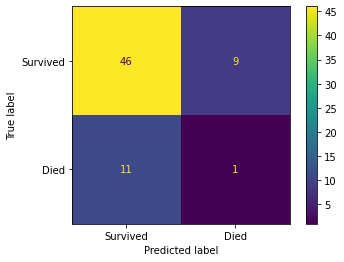

In [32]:
# Neural Network

classifier = MLPClassifier(solver='lbfgs', alpha=0.0001)
classifier.fit(X_train, Y_train)

print('Accuracy: {:.2f}'.format(classifier.score(X_test, Y_test)))

prediction = classifier.predict(X_test)

cm = confusion_matrix(Y_test, prediction, labels=classifier.classes_)
predict_labels = ["Survived","Died"]

disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = predict_labels)
disp.plot()
plt.show()

2b. Compare the 4 methods based on the performance metrics and identify the best
model for this problem.
- Use 10 - fold cross validation.
- Use GridSearchCV for searching through hyper parameters.

In [52]:
# 10 Fold cross validation, use parameter cv=10 in cross_val_score()

print("Logistic Regression: " + str(cross_val_score(LogisticRegression(max_iter=300), X_test, Y_test, cv=10, scoring='accuracy').mean()))
print("Random Forest: " + str(cross_val_score(RandomForestClassifier(), X_test, Y_test, cv=10, scoring='accuracy').mean()))
print("Support Vector Machine: " + str(cross_val_score(SVC(), X_test, Y_test, cv=10, scoring='accuracy').mean()))
print("Neural Network: " + str(cross_val_score(MLPClassifier(solver='lbfgs', alpha=0.0001), X_test, Y_test, cv=10, scoring='accuracy').mean()))

# ANSWER: the Support Vector Machine (SVM) is performing the most accurately at 76%

Logistic Regression: 0.7
Random Forest: 0.657142857142857
Support Vector Machine: 0.7642857142857142
Neural Network: 0.580952380952381


In [67]:
# GridSearchCV for hyper parameter tuning - finding the best parms to pass into the model
# Finding for SVM since it was the best model to use based on cross validation

# 2nd parm is grid of parms/values to eval
clf = GridSearchCV(svm.SVC(gamma='auto'),{'C':[1,10,20],
                                          'kernel':['rbf','linear']}, 
                            cv=10, return_train_score=False)
clf.fit(X_train, Y_train)

df = pd.DataFrame(clf.cv_results_)
df[['param_C','param_kernel','mean_test_score']]

#dir(clf) # get list of all available properties
print('Best score of {:.2f}'.format(clf.best_score_)+ ' with following parms:')
clf.best_params_

Best score of 0.76 with following parms:


{'C': 1, 'kernel': 'rbf'}

3. Evaluate: are the algorithms overfitting? (10)

>1, train: 84.946, test: 75.000, diff: 9.95
>2, train: 82.796, test: 75.000, diff: 7.80
>3, train: 83.333, test: 77.500, diff: 5.83
>4, train: 85.484, test: 73.750, diff: 11.73
>5, train: 83.871, test: 77.500, diff: 6.37
>6, train: 84.946, test: 77.500, diff: 7.45
>7, train: 83.333, test: 86.250, diff: -2.92
>8, train: 84.946, test: 83.750, diff: 1.20
>9, train: 81.720, test: 76.250, diff: 5.47
>10, train: 83.871, test: 75.000, diff: 8.87
>11, train: 82.258, test: 82.500, diff: -0.24
>12, train: 84.946, test: 75.000, diff: 9.95
>13, train: 85.484, test: 78.750, diff: 6.73
>14, train: 81.183, test: 78.750, diff: 2.43
>15, train: 84.946, test: 80.000, diff: 4.95
>16, train: 81.720, test: 78.750, diff: 2.97
>17, train: 81.720, test: 81.250, diff: 0.47
>18, train: 82.258, test: 75.000, diff: 7.26
>19, train: 80.645, test: 72.500, diff: 8.15
>20, train: 82.258, test: 80.000, diff: 2.26
>21, train: 83.333, test: 80.000, diff: 3.33
>22, train: 83.871, test: 81.250, diff: 2.62
>23, train: 82.2

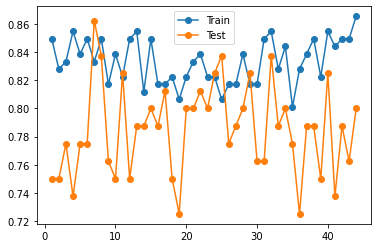

In [157]:
# Evaluate overfitting - using encoded data

train_scores, test_scores = list(), list()
values = [i for i in range(1, 45)]
for i in values:
    X = data_henc.iloc[:,1:]  # select all columns beginning at 2nd column (index[1])
    Y = data_henc.iloc[:,0]   # set as the decision var
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

    classifier = SVC(kernel='rbf')
    classifier.fit(X_train, Y_train)
    
    # evaluate on the train dataset
    train_predict = classifier.predict(X_train)
    train_acc = accuracy_score(Y_train, train_predict)
    train_scores.append(train_acc)
    # evaluate on the test dataset
    test_predict = classifier.predict(X_test)
    test_acc = accuracy_score(Y_test, test_predict)
    test_scores.append(test_acc)
    
    print('>%d, train: %.3f, test: %.3f, diff: %.2f' % (i, train_acc*100, test_acc*100, (train_acc-test_acc)*100))

# plot of train and test scores vs number of neighbors
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

#CONCLUSION: With an average diff between train and test of about 5%, we determine there is NO overfitting.

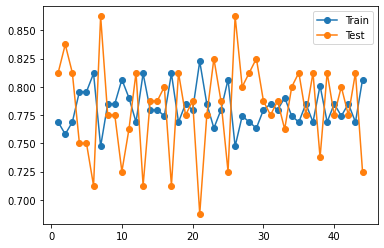

In [150]:
# Evaluate overfitting - raw data

train_scores, test_scores = list(), list()
values = [i for i in range(1, 45)]
for i in values:
    X = data_no_outlier.iloc[:,0:3]  # select all columns beginning at 2nd column (index[1])
    Y = data_no_outlier.iloc[:,3]   # set as the decision var
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

    classifier = SVC(kernel='rbf')
    classifier.fit(X_train, Y_train)
    
    # evaluate on the train dataset
    train_predict = classifier.predict(X_train)
    train_acc = accuracy_score(Y_train, train_predict)
    train_scores.append(train_acc)
    # evaluate on the test dataset
    test_predict = classifier.predict(X_test)
    test_acc = accuracy_score(Y_test, test_predict)
    test_scores.append(test_acc)

    #print('>%d, train: %.3f, test: %.3f, diff: %.2f' % (i, train_acc*100, test_acc*100, (train_acc-test_acc)*100))
    
# plot of train and test scores vs number of neighbors
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

4. Develop a function which can implement machine learning. (20)

def machine_learning (data, algorithm):
    
    …
    plot ROC curve
    return performance metrics
    
Function call: machine_learning (data, neural_network)


Results for algorithm: logistic_regression

              precision    recall  f1-score   support

           1       0.84      0.83      0.83        58
           2       0.00      0.00      0.00         9

    accuracy                           0.72        67
   macro avg       0.42      0.41      0.42        67
weighted avg       0.73      0.72      0.72        67



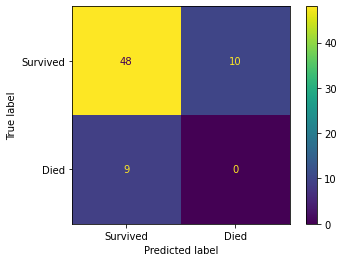

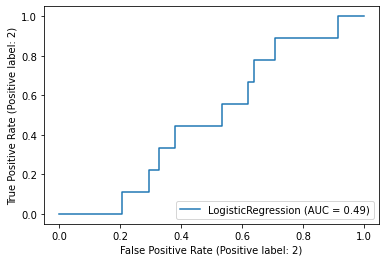


Results for algorithm: random_forest

              precision    recall  f1-score   support

           1       0.85      1.00      0.92        57
           2       0.00      0.00      0.00        10

    accuracy                           0.85        67
   macro avg       0.43      0.50      0.46        67
weighted avg       0.72      0.85      0.78        67



C:\Users\csutt\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\csutt\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\csutt\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


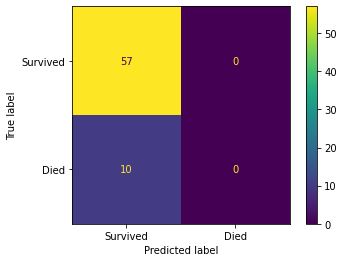

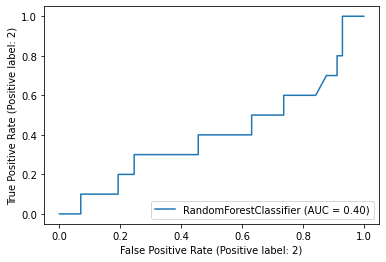


Results for algorithm: support_vector_machine

              precision    recall  f1-score   support

           1       0.85      1.00      0.92        57
           2       0.00      0.00      0.00        10

    accuracy                           0.85        67
   macro avg       0.43      0.50      0.46        67
weighted avg       0.72      0.85      0.78        67



C:\Users\csutt\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\csutt\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\csutt\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


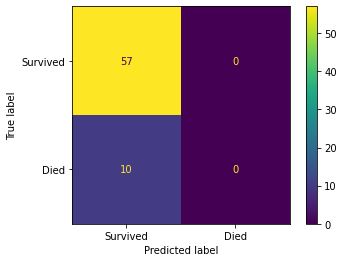

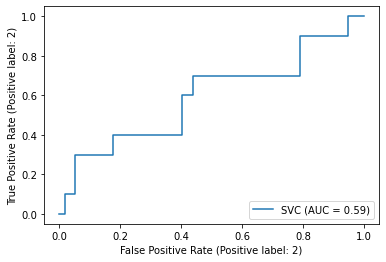


Results for algorithm: neural_network

              precision    recall  f1-score   support

           1       0.80      0.77      0.79        53
           2       0.25      0.29      0.27        14

    accuracy                           0.67        67
   macro avg       0.53      0.53      0.53        67
weighted avg       0.69      0.67      0.68        67



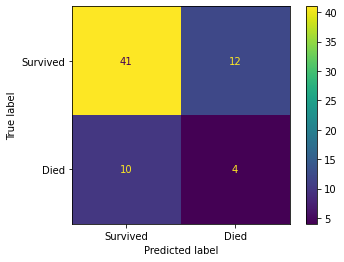

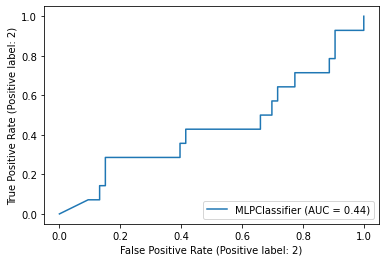

In [159]:
def machine_learning(data, algorithm):
    algorithm.lower()
    
    #hot encode data - makes the decision var the index at column 0
    data_henc = pd.get_dummies(data, columns = ["AgeAtOperation","OperationYear","NumAxillaryNodes"])
    #data_henc.columns ### no unknown columns to remove

    # set up test and training data sets
    X = data_henc.iloc[:,1:]  # select all columns beginning at 2nd column (index[1])
    Y = data_henc.iloc[:,0]   # set as the decision var
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
    
    if algorithm == 'logistic_regression':
        classifier = LogisticRegression(solver='lbfgs',random_state=10, penalty='none', max_iter=300)
    elif algorithm == 'random_forest':
        classifier = RandomForestClassifier(max_depth=2, random_state=0)
    elif algorithm == 'support_vector_machine':
        classifier = SVC(kernel='rbf')
    elif algorithm == 'neural_network':
        classifier = MLPClassifier(solver='lbfgs', alpha=0.0001)
 
    print('\n\rResults for algorithm: ' + algorithm)
    classifier.fit(X_train, Y_train)
    prediction = classifier.predict(X_test)
    print ('\n\r' + classification_report(Y_test, prediction, labels=classifier.classes_))
    
    cm = confusion_matrix(Y_test, prediction, labels=classifier.classes_)
    predict_labels = ["Survived","Died"]
    disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = predict_labels)
    disp.plot()
    plt.show()

    plot_roc_curve(classifier, X_test, Y_test)
    plt.show()
    
machine_learning(data_no_outlier,'logistic_regression')
machine_learning(data_no_outlier,'random_forest')
machine_learning(data_no_outlier,'support_vector_machine')
machine_learning(data_no_outlier,'neural_network')